In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from scorer import evalution
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from utils.date_utils import *
from utils.history_generator_copy import *

In [88]:
from scipy.stats import mode
PARAM_DAYS = 28
train = pd.read_csv('splits/data/train.csv', parse_dates=['DATE'])
test_date = train.DATE.iloc[-992]
scores = []
for i in range(10,15,1):
    np.random.seed(i)
    ho_IDs = np.random.choice( train.ATM_ID.unique(), 50, replace=False)

    ho_set = train[train.ATM_ID.isin(ho_IDs)]
    ho_test_set = ho_set[ho_set.DATE>test_date].reset_index(drop=True)
    ho_test_set['DATE'] = ho_test_set['DATE'].astype(str)
    ho_set = ho_set.drop(index=ho_set[ho_set.DATE>test_date].index)

    # The dates to predict
    pred_dates  = ['2017-07-14', '2017-07-15', '2017-07-16', '2017-07-17',
           '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-21',
           '2017-07-22', '2017-07-23', '2017-07-24', '2017-07-25',
           '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-29',
           '2017-07-30', '2017-07-31', '2017-08-01', '2017-08-02',
           '2017-08-03', '2017-08-04', '2017-08-05', '2017-08-06',
           '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
           '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
           '2017-08-15']

    ho_set['DOW'] = ho_set.DATE.dt.dayofweek

    def generate_month(series):
        generated_ = series.tail(PARAM_DAYS).groupby('DOW').CLIENT_OUT.quantile(.35)[[4,5,6,0,1,2,3]]
        generated = pd.concat((generated_, generated_, generated_, generated_, generated_[:5]))
    #     return generated
        return pd.DataFrame({'DATE': pred_dates, 'CLIENT_OUT': generated})

    gb = ho_set.groupby('ATM_ID').apply(generate_month)

    submit = gb.reset_index().drop('DOW', axis=1)
    score = evalution(submit, ho_test_set)
    scores += [score,]
scores = np.array(scores)
print('CV =',scores.mean())

4734.99652810008
5103.1131149142
4825.9741178253325
4398.722502859075
5274.971438224473
CV = 4867.555540384632


In [3]:
weeknds = get_weeknds_set()
till_weeknd = get_days_till_weeknd(weeknds)
from_weeknd = get_days_from_weeknd(weeknds)
num_of_weeknds = get_number_of_weeknds(weeknds)

In [15]:
PARAM_DAYS = 105
train = pd.read_csv('splits/data/train.csv', parse_dates=['DATE'])
test_date = train.DATE.iloc[-992]
sep_date = train.DATE.iloc[-992-PARAM_DAYS+1]
train.drop(index=train[train.DATE<sep_date].index, inplace=True)
train["DOW"] = train.DATE.dt.dayofweek
train["DIM"] = train.DATE.dt.day
train["DIP"] = train.DATE.dt.dayofyear
prd_start_DOY = train.DIP.min()
train["DIP"] = train.DIP - prd_start_DOY

train['is_weeknd'] = train.DATE.apply(lambda x: x in weeknds)
train['days_till_weeknd'] = train.DATE.apply(lambda x: till_weeknd[x])
train['days_from_weeknd'] = train.DATE.apply(lambda x: from_weeknd[x])
train['weeknds_this_week'] = train.DATE.apply(lambda x: num_of_weeknds[x])

train['prev_week_date'] = train.DATE.shift(7)
#train.fillna(pd.to_datetime("20141228", format='%Y%m%d'), inplace=True)
train['next_week_date'] = train.DATE.shift(-7)
#train.fillna(pd.to_datetime("20170924", format='%Y%m%d'), inplace=True)

train['weeknds_prev_week'] = train.prev_week_date.apply(lambda x: num_of_weeknds[x] if x in num_of_weeknds else 2)
train['weeknds_next_week'] = train.next_week_date.apply(lambda x: num_of_weeknds[x] if x in num_of_weeknds else 2)

train.drop(['prev_week_date', 'next_week_date'], axis=1, inplace=True)

train['atm_mean'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().mean().shift().reset_index().CLIENT_OUT
train['atm_median'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().median().shift().reset_index().CLIENT_OUT
train['atm_std'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().std().shift().reset_index().CLIENT_OUT
train['atm_skew'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().skew().shift().reset_index().CLIENT_OUT
train['atm_zeros'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().apply(lambda x: (x == 0.0).sum()).shift().reset_index().CLIENT_OUT




In [17]:
pred_dates  = ['2017-07-14', '2017-07-15', '2017-07-16', '2017-07-17',
           '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-21',
           '2017-07-22', '2017-07-23', '2017-07-24', '2017-07-25',
           '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-29',
           '2017-07-30', '2017-07-31', '2017-08-01', '2017-08-02',
           '2017-08-03', '2017-08-04', '2017-08-05', '2017-08-06',
           '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
           '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
           '2017-08-15']

In [ ]:
pred_dates  = ['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31',
               '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-16',
               '2017-09-17']

In [18]:
cols = [
#     'DIP', 
        'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'
    , 'DIM_1', 'DIM_2', 'DIM_3', 'DIM_4',
       'DIM_5', 'DIM_6', 'DIM_7', 'DIM_8', 'DIM_9', 'DIM_10', 'DIM_11',
       'DIM_12', 'DIM_13', 'DIM_14', 'DIM_15', 'DIM_16', 'DIM_17', 'DIM_18',
       'DIM_19', 'DIM_20', 'DIM_21', 'DIM_22', 'DIM_23', 'DIM_24', 'DIM_25',
       'DIM_26', 'DIM_27', 'DIM_28', 'DIM_29', 'DIM_30', 'DIM_31',
#         'is_weeknd', 'days_till_weeknd', 'days_from_weeknd', 'weeknds_this_week',
#         'weeknds_prev_week', 'weeknds_next_week',
#         'atm_mean', 'atm_median', 'atm_std', 'atm_skew', 'atm_zeros'
       
       ]

In [19]:
from xgboost import XGBRegressor
def generate_month_rf(series, **kwargs):
    dt_srs = pd.Series(pd.to_datetime(pred_dates))
    gs = pd.DataFrame({'DATE': dt_srs, 'DOW': dt_srs.dt.dayofweek, 'DIM': dt_srs.dt.day, 'DIP': dt_srs.dt.dayofyear - prd_start_DOY})
    gs = pd.get_dummies(gs, columns=['DOW', 'DIM'])
    gs['is_weeknd'] = gs.DATE.apply(lambda x: x in weeknds)
    gs['days_till_weeknd'] = gs.DATE.apply(lambda x: till_weeknd[x])
    gs['days_from_weeknd'] = gs.DATE.apply(lambda x: from_weeknd[x])
    gs['weeknds_this_week'] = gs.DATE.apply(lambda x: num_of_weeknds[x])

    gs['prev_week_date'] = gs.DATE.shift(7)
    #train.fillna(pd.to_datetime("20141228", format='%Y%m%d'), inplace=True)
    gs['next_week_date'] = gs.DATE.shift(-7)
    #train.fillna(pd.to_datetime("20170924", format='%Y%m%d'), inplace=True)

    gs['weeknds_prev_week'] = gs.prev_week_date.apply(lambda x: num_of_weeknds[x] if x in num_of_weeknds else 2)
    gs['weeknds_next_week'] = gs.next_week_date.apply(lambda x: num_of_weeknds[x] if x in num_of_weeknds else 2)

    gs.drop(['prev_week_date', 'next_week_date'], axis=1, inplace=True)
       
    gs['atm_mean'] = series['atm_mean']
    gs['atm_median'] = series['atm_median']
    gs['atm_std'] = series['atm_std']
    gs['atm_skew'] = series['atm_skew']
    gs['atm_zeros'] = series['atm_zeros']


    
    rgs = XGBRegressor(n_jobs=-1, **kwargs)
    rgs.fit(series[cols], series.CLIENT_OUT)
    
    gs['CLIENT_OUT'] = rgs.predict(gs[cols])

#     gs.loc[gs[gs['CLIENT_OUT']<0]['CLIENT_OUT'].index]=0
    return gs[['DATE', 'CLIENT_OUT']]

In [20]:
hyper_param = {'n_estimators' : 100, 'learning_rate' : 0.1, 'max_depth' : 10, 'min_child_weight':10, 'subsample':1}
gen = lambda x : generate_month_rf(x, **hyper_param)
scores = []
for i in [20,21,23,24,25]:
    np.random.seed(i)
    ho_IDs = np.random.choice( train.ATM_ID.unique(), 50, replace=False)
    ho_set = train[train.ATM_ID.isin(ho_IDs)]
    ho_test_set = ho_set[ho_set.DATE>test_date].reset_index(drop=True)
    ho_test_set.drop(columns=['DOW', 'DIM', 'DIP'], inplace=True)
    ho_set = ho_set.drop(index=ho_set[(ho_set.DATE>test_date)].index)
    ho_set.reset_index(drop=True, inplace=True)
    ho_set = pd.get_dummies(ho_set, columns=['DOW', 'DIM'])

    gb = ho_set.groupby('ATM_ID').apply(gen).reset_index().drop(columns=['level_1'])
    gb.CLIENT_OUT = np.where(gb['CLIENT_OUT'] <0, 0,gb['CLIENT_OUT'])    
    score = evalution(ho_test_set[['DATE', 'ATM_ID', 'CLIENT_OUT']], gb[['DATE', 'ATM_ID', 'CLIENT_OUT']])
    scores += [score]
print('CV =', np.array(scores).mean())

5801.510240807194
5836.373978119128
5959.792012139174
5821.934673052565
5680.625301772751
CV = 5820.047241178162


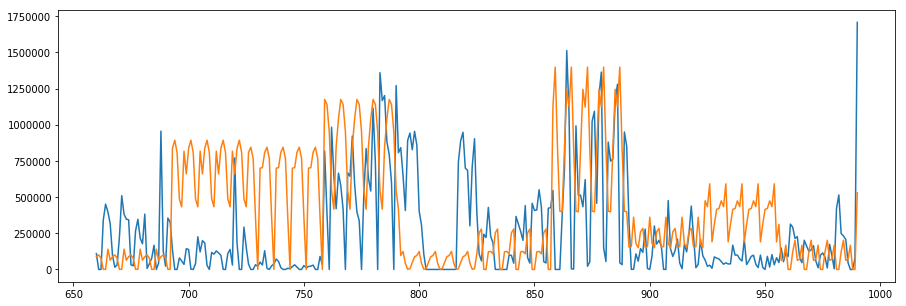

In [31]:
l, r = 660, 990
plt.figure(figsize=[15,5])
ho_test_set.reset_index(drop=True).loc[l:r].CLIENT_OUT.plot()
gb.reset_index(drop=True).loc[l:r].CLIENT_OUT.plot()
plt.show()

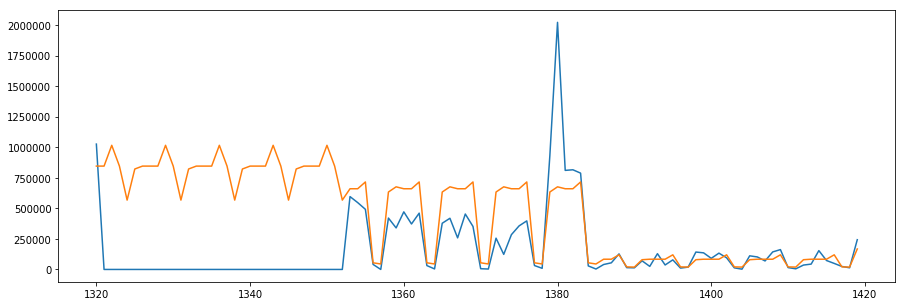

In [24]:
l, r = 1320, 1419
plt.figure(figsize=[15,5])
true.reset_index(drop=True).loc[l:r].CLIENT_OUT.plot()
submission.reset_index(drop=True).loc[l:r].CLIENT_OUT.plot()
plt.show()

In [18]:
(true.reset_index(drop=True).loc[1320:1353].CLIENT_OUT-submission.reset_index(drop=True).loc[1320:1353].CLIENT_OUT).abs().sum()

26679749.3

In [20]:
(true.reset_index(drop=True).loc[1386:1419].CLIENT_OUT-submission.reset_index(drop=True).loc[1386:1419].CLIENT_OUT).abs().sum()

1032383.325

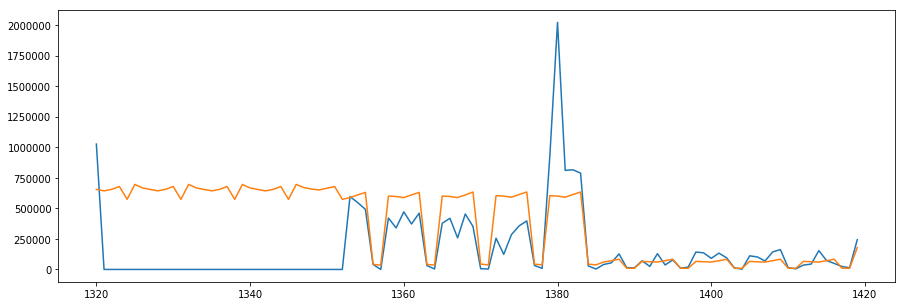

In [15]:
l, r = 1320, 1419
plt.figure(figsize=[15,5])
true.reset_index(drop=True).loc[l:r].CLIENT_OUT.plot()
submission.reset_index(drop=True).loc[l:r].CLIENT_OUT.plot()
plt.show()

In [14]:
(true.reset_index(drop=True).loc[1320:1353].CLIENT_OUT-submission.reset_index(drop=True).loc[1320:1353].CLIENT_OUT).abs().sum()

21230886.693174858

In [16]:
import pandas as pd
import numpy as np
#from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from utils.date_utils import *

PARAM_DAYS = 105
train = pd.read_csv('splits/data/train_private.csv', parse_dates=['DATE'])

# The dates to predict
pred_dates  = ['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31',
               '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-16',
               '2017-09-17']

cols = ['DIP', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'DIM_1', 'DIM_2', 'DIM_3', 'DIM_4',
       'DIM_5', 'DIM_6', 'DIM_7', 'DIM_8', 'DIM_9', 'DIM_10', 'DIM_11',
       'DIM_12', 'DIM_13', 'DIM_14', 'DIM_15', 'DIM_16', 'DIM_17', 'DIM_18',
       'DIM_19', 'DIM_20', 'DIM_21', 'DIM_22', 'DIM_23', 'DIM_24', 'DIM_25',
       'DIM_26', 'DIM_27', 'DIM_28', 'DIM_29', 'DIM_30', 'DIM_31'
#         ,'is_weeknd', 'days_till_weeknd', 'days_from_weeknd', 'weeknds_this_week',
#        'weeknds_prev_week', 'weeknds_next_week',
#         'atm_mean'
#         , 'atm_median'
#         , 'atm_std', 'atm_skew'
#         , 'atm_zeros'
       
       ]

weeknds = get_weeknds_set()
till_weeknd = get_days_till_weeknd(weeknds)
from_weeknd = get_days_from_weeknd(weeknds)
num_of_weeknds = get_number_of_weeknds(weeknds)

test_date = train.DATE.iloc[-992]
sep_date = train.DATE.iloc[-992-PARAM_DAYS+1]
train.drop(index=train[train.DATE<sep_date].index, inplace=True)
train["DOW"] = train.DATE.dt.dayofweek
train["DIM"] = train.DATE.dt.day
train["DIP"] = train.DATE.dt.dayofyear
prd_start_DOY = train.DIP.min()
train["DIP"] = train.DIP - prd_start_DOY
train = pd.get_dummies(train, columns=['DOW', 'DIM'])

train['is_weeknd'] = train.DATE.apply(lambda x: x in weeknds)
train['days_till_weeknd'] = train.DATE.apply(lambda x: till_weeknd[x])
train['days_from_weeknd'] = train.DATE.apply(lambda x: from_weeknd[x])
train['weeknds_this_week'] = train.DATE.apply(lambda x: num_of_weeknds[x])

train['prev_week_date'] = train.DATE.shift(7)
#train.fillna(pd.to_datetime("20141228", format='%Y%m%d'), inplace=True)
train['next_week_date'] = train.DATE.shift(-7)
#train.fillna(pd.to_datetime("20170924", format='%Y%m%d'), inplace=True)

train['weeknds_prev_week'] = train.prev_week_date.apply(lambda x: num_of_weeknds[x] if x in num_of_weeknds else 2)
train['weeknds_next_week'] = train.next_week_date.apply(lambda x: num_of_weeknds[x] if x in num_of_weeknds else 2)

train.drop(['prev_week_date', 'next_week_date'], axis=1, inplace=True)

train['atm_mean'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().mean().shift().reset_index().CLIENT_OUT
# train['atm_median'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().median().shift().reset_index().CLIENT_OUT
train['atm_std'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().std().shift().reset_index().CLIENT_OUT
train['atm_skew'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().skew().shift().reset_index().CLIENT_OUT
train['atm_zeros'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().apply(lambda x: (x == 0.0).sum()).shift().reset_index().CLIENT_OUT
med = train.groupby("ATM_ID").CLIENT_OUT.mean()
train = train.merge(med.reset_index().rename(columns={'CLIENT_OUT':'atm_median'}), how='left', on='ATM_ID')

hyper_param = {'n_estimators' : 100, 'learning_rate' : 0.1, 'max_depth' : 10, 'min_child_weight':20, 'subsample':1}
gen = lambda x : generate_month_rf(x, **hyper_param)
def generate_month_rf(series, **kwargs):
#     print(series.atm_median.head())
    dt_srs = pd.Series(pd.to_datetime(pred_dates))
    gs = pd.DataFrame({'DATE': dt_srs, 'DOW': dt_srs.dt.dayofweek, 'DIM': dt_srs.dt.day, 'DIP': dt_srs.dt.dayofyear - prd_start_DOY})
    gs = pd.get_dummies(gs, columns=['DOW', 'DIM'])
    gs['is_weeknd'] = gs.DATE.apply(lambda x: x in weeknds)
    gs['days_till_weeknd'] = gs.DATE.apply(lambda x: till_weeknd[x])
    gs['days_from_weeknd'] = gs.DATE.apply(lambda x: from_weeknd[x])
    gs['weeknds_this_week'] = gs.DATE.apply(lambda x: num_of_weeknds[x])

    gs['prev_week_date'] = gs.DATE.shift(7)
    #train.fillna(pd.to_datetime("20141228", format='%Y%m%d'), inplace=True)
    gs['next_week_date'] = gs.DATE.shift(-7)
    #train.fillna(pd.to_datetime("20170924", format='%Y%m%d'), inplace=True)

    gs['weeknds_prev_week'] = gs.prev_week_date.apply(lambda x: num_of_weeknds[x] if x in num_of_weeknds else 2)
    gs['weeknds_next_week'] = gs.next_week_date.apply(lambda x: num_of_weeknds[x] if x in num_of_weeknds else 2)

    gs.drop(['prev_week_date', 'next_week_date'], axis=1, inplace=True)
       
    gs['atm_mean'] = series['atm_mean']
    gs['atm_median'] = series['atm_median'].iloc[0]
    gs['atm_std'] = series['atm_std']
    gs['atm_skew'] = series['atm_skew']
    gs['atm_zeros'] = series['atm_zeros']
    rgs = XGBRegressor(n_jobs=-1, **kwargs)
    rgs.fit(series[cols], series.CLIENT_OUT)
    
    gs['CLIENT_OUT'] = rgs.predict(gs[cols])
#     print(series.atm_median.head(2))
    return gs[['DATE', 'CLIENT_OUT']]

gb = train.groupby('ATM_ID').apply(gen).reset_index()[['DATE', 'ATM_ID', 'CLIENT_OUT']]
gb.CLIENT_OUT = np.where(gb['CLIENT_OUT'] <0, 0,gb['CLIENT_OUT']) 

gb.to_csv('submission.csv', index=False)

submission = pd.read_csv('submission.csv', parse_dates=['DATE'])

true = pd.read_csv('splits/data/y_true_private.csv', parse_dates=['DATE'])

evalution(submission[['DATE', 'ATM_ID', 'CLIENT_OUT']], true[['DATE', 'ATM_ID', 'CLIENT_OUT']])

866.3563048966753


866.3563048966753

In [22]:
evalution(submission[['DATE', 'ATM_ID', 'CLIENT_OUT']].drop(index=np.arange(1320,1353)), true[['DATE', 'ATM_ID', 'CLIENT_OUT']].drop(index=np.arange(1320,1353)))
          
          

$The submission should have exactly 1650 rows.$
5973.545965061367


5973.545965061367

In [25]:
import numpy as np
import pandas as pd
from date_utils import *
from history_generator import *
import sys
import lightgbm as lgb

train = pd.read_csv('splits/data/train_private.csv', parse_dates=['DATE'])

ATM_IDs = train.ATM_ID.unique()

pred_dates  = ['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31',
               '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-16',
               '2017-09-17']


rows = []
for ATM in ATM_IDs: 
    for date in pred_dates:
        rows.append([date, ATM, np.nan])
        
test = pd.DataFrame(rows, columns = ['DATE', 'ATM_ID', 'CLIENT_OUT'])     
test['DATE'] = pd.to_datetime(test['DATE'])


train = pd.concat([train, test])
train.sort_values(by=['ATM_ID', 'DATE'], inplace=True)
train.reset_index(inplace=True, drop=True)

train['day'] = train.DATE - train.DATE.min()
train['day'] = train['day'].apply(lambda x: x.days)
train['week'] = train['day'].apply(lambda x: x//7)
train['dayofweek'] = train.DATE.apply(lambda x: x.dayofweek)
train['month_from_start'] = (train.DATE.apply(lambda x: x.year)-2015)*12 + (train.DATE.apply(lambda x: x.month) - 1)

#for_valid = train[["day", "ATM_ID", "CLIENT_OUT"]].copy()                  
#train.loc[(train.day>=928) & (train.day<958), 'CLIENT_OUT'] = np.nan

print('GENERATING ATM FEATURES', file=sys.stderr)
################### GENERATE ATM FEATURES ###################################
train['atm_mean'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().mean().shift().reset_index().CLIENT_OUT
train['atm_median'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().median().shift().reset_index().CLIENT_OUT
train['atm_std'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().std().shift().reset_index().CLIENT_OUT
train['atm_skew'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().skew().shift().reset_index().CLIENT_OUT
train['atm_zeros'] = train.groupby("ATM_ID").CLIENT_OUT.expanding().apply(lambda x: (x == 0.0).sum()).shift().reset_index().CLIENT_OUT
############################################################################


print('GENERATING WEEKNDS FEATURES', file=sys.stderr)
################### WEEKNDS ########################################
weeknds = get_weeknds_set()
till_weeknd = get_days_till_weeknd(weeknds)
from_weeknd = get_days_from_weeknd(weeknds)
num_of_weeknds = get_number_of_weeknds(weeknds)
train['is_weeknd'] = train.DATE.apply(lambda x: x in weeknds)
train['days_till_weeknd'] = train.DATE.apply(lambda x: till_weeknd[x])
train['days_from_weeknd'] = train.DATE.apply(lambda x: from_weeknd[x])
train['weeknds_this_week'] = train.DATE.apply(lambda x: num_of_weeknds[x])

train['prev_week_date'] = train.DATE.shift(7)
#train.fillna(pd.to_datetime("20141228", format='%Y%m%d'), inplace=True)
train['next_week_date'] = train.DATE.shift(-7)
#train.fillna(pd.to_datetime("20170924", format='%Y%m%d'), inplace=True)

train['weeknds_prev_week'] = train.prev_week_date.apply(lambda x: num_of_weeknds[x] if x in num_of_weeknds else 2)
train['weeknds_next_week'] = train.next_week_date.apply(lambda x: num_of_weeknds[x] if x in num_of_weeknds else 2)

train.drop(['prev_week_date', 'next_week_date'], axis=1, inplace=True)
############################################################################

print('GENERATING MONTH ONE FEATURES', file=sys.stderr)
################### MONTH ########################################
train['month'] = train.DATE.apply(lambda x: x.month)
##################################################################

atm_ids = train.ATM_ID.unique()
y_pred = []
for atmIDCUR in atm_ids:
    train_atm = train[(train.ATM_ID == atmIDCUR) & (train.day>500)]
    x_train = train_atm[(train_atm.day<958)].copy()
    #x_valid = train_atm[(train_atm.day>=928) & (train_atm.day<958)].copy()
    x_test = train_atm[train_atm.day>=958].copy()
    x_train.dropna(inplace=True)

    y_train = x_train.CLIENT_OUT
    #y_valid = for_valid[(for_valid.ATM_ID == atmIDCUR) & (for_valid.day>=928) & (for_valid.day<958)].CLIENT_OUT
    x_train.drop(['DATE', "ATM_ID", "CLIENT_OUT"], inplace=True, axis=1)
   # x_valid.drop(['DATE', "ATM_ID", "CLIENT_OUT"], inplace=True, axis=1)
    
    x_test.drop(['DATE', "ATM_ID", "CLIENT_OUT"], inplace=True, axis=1)
    
    #print(y_valid)
   
    # create dataset for lightgbm
    lgb_train = lgb.Dataset(x_train, y_train)
 #   lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

    params = {'num_leaves': 127,
              'learning_rate': 0.01,
              'reg_lambda': 0,
              'feature_fraction': 0.8,
              'boosting_type': 'gbdt',
              'verbose': 0,
              'bagging_freq': 5,
              'bagging_fraction': 0.8, 
              'objective': 'regression',
              'task': 'train',
              'reg_alpha': 0.001,
              'max_bin': 127, 
              'reg_sqrt': True,
              'metric': {'l1'}}

    gbm = lgb.train(params,
                        lgb_train,
                        num_boost_round=200)
    
    y_pred.extend(gbm.predict(x_test))

submission = pd.DataFrame(rows, columns = ['DATE', 'ATM_ID', 'CLIENT_OUT'])        
submission.CLIENT_OUT = y_pred
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv', parse_dates=['DATE'])

true = pd.read_csv('splits/data/y_true_private.csv', parse_dates=['DATE'])

evalution(submission[['DATE', 'ATM_ID', 'CLIENT_OUT']], true[['DATE', 'ATM_ID', 'CLIENT_OUT']])

GENERATING ATM FEATURES
GENERATING WEEKNDS FEATURES
GENERATING MONTH ONE FEATURES


2019.2849354191985


2019.2849354191985

In [26]:
evalution(submission[['DATE', 'ATM_ID', 'CLIENT_OUT']].drop(index=np.arange(1320,1353)), true[['DATE', 'ATM_ID', 'CLIENT_OUT']].drop(index=np.arange(1320,1353)))
          
          

$The submission should have exactly 1650 rows.$
6077.430705412946


6077.430705412946

In [46]:
gb = pd.read_csv('Archive-2/submission.csv', parse_dates=["DATE"])

true = pd.read_csv('splits/data/y_true_public.csv', parse_dates=['DATE'])

evalution(true, gb)

1497.8995669945343


1497.8995669945343

In [89]:
import pandas as pd
#import ruptures as rpt
#algo = rpt.Binseg(model="rbf", min_size=100).fit(data[data['ATM_ID'] == 18]['CLIENT_OUT']/1e6)
#result = algo.predict(pen=10)

PARAM_DAYS = 28
train = pd.read_csv('splits/data/train_public.csv', parse_dates=['DATE'])

# The dates to predict
pred_dates  = ['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31',
               '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-16',
               '2017-09-17']

train['DOW'] = train.DATE.dt.dayofweek

def generate_month(series):
    generated_ = series.tail(PARAM_DAYS).groupby('DOW').CLIENT_OUT.quantile(.35)[[2,3,4,5,6,0,1]]
    generated = pd.concat((generated_, generated_, generated_, generated_, generated_[:5]))
#     return generated
    return pd.DataFrame({'DATE': pred_dates, 'CLIENT_OUT': generated})

gb = train.groupby('ATM_ID').apply(generate_month)

submit = gb.reset_index().drop('DOW', axis=1)

submit.to_csv('submission.csv', index=False)
submit = pd.read_csv('submission.csv', parse_dates=['DATE'])

true = pd.read_csv('splits/data/y_true_public.csv', parse_dates=['DATE'])

evalution(submit, true)

5087.639390092008


5087.639390092008

In [94]:
gb['CLIENT_OUT'] = np.where(gb['CLIENT_OUT'] <0, 0,gb['CLIENT_OUT'])

In [85]:
gb.loc[gb[gb['CLIENT_OUT']<0]['CLIENT_OUT'].index, 'CLIENT_OUT'] = 0

In [86]:
gb.loc[gb[gb['CLIENT_OUT']<0]['CLIENT_OUT'].index, 'CLIENT_OUT']

Series([], Name: CLIENT_OUT, dtype: float32)

In [171]:
trai = pd.read_csv('train.csv.zip', parse_dates=['DATE'])

ho_IDs = np.random.choice( trai.ATM_ID.unique(), 50, replace=False)

ho_set = trai[trai.ATM_ID.isin(ho_IDs)]
ho_set.to_csv('trai.csv', index=False)

In [175]:
tt = pd.read_csv('submission.csv')

In [263]:
def generate_month_rf(series):
    dt_srs = pd.Series(pd.to_datetime(pred_dates))
    gs = pd.DataFrame({'DATE': dt_srs, 'DOW': dt_srs.dt.dayofweek, 'DIM': dt_srs.dt.day, 'DIP': dt_srs.dt.dayofyear - prd_start_DOY})
    gs = pd.get_dummies(gs, columns=['DOW', 'DIM'])
    gs['is_weeknd'] = gs.DATE.apply(lambda x: x in weeknds)
    gs['days_till_weeknd'] = gs.DATE.apply(lambda x: till_weeknd[x])
    gs['days_from_weeknd'] = gs.DATE.apply(lambda x: from_weeknd[x])
    gs['weeknds_this_week'] = gs.DATE.apply(lambda x: num_of_weeknds[x])
    rgs = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1)
    rgs.fit(series[cols], series.CLIENT_OUT)
    gs['CLIENT_OUT'] = rgs.predict(gs[cols])
    return gs[['DATE', 'CLIENT_OUT']]

In [ ]:
hyper_param = {'n_estimators' : 100, 'learning_rate' : 0.2, 'max_depth' : 3, 'min_child_weight':10, 'subsample':0}
gen = lambda x : generate_month_rf(x, **hyper_param)
scores = []
for i in [20,21,23,24,25]:
    np.random.seed(i)
    ho_IDs = np.random.choice( train.ATM_ID.unique(), 50, replace=False)
    ho_set = train[train.ATM_ID.isin(ho_IDs)]
    ho_test_set = ho_set[ho_set.DATE>test_date].reset_index(drop=True)
    ho_test_set.drop(columns=['DOW', 'DIM', 'DIP'], inplace=True)
    ho_set = ho_set.drop(index=ho_set[(ho_set.DATE>test_date)].index)
    ho_set.reset_index(drop=True, inplace=True)
    ho_set = pd.get_dummies(ho_set, columns=['DOW', 'DIM'])

    gb = ho_set.groupby('ATM_ID').apply(generate_month_rf).reset_index().drop(columns=['level_1'])
    
    score = evalution(ho_test_set[['DATE', 'ATM_ID', 'CLIENT_OUT']], gb[['DATE', 'ATM_ID', 'CLIENT_OUT']])
    scores += [score]
print('CV =', np.array(scores).mean())

5317.187663273192


In [72]:
PARAM_DAYS = 70
train = pd.read_csv('train.csv.zip', parse_dates=['DATE'])
sample = train.copy()
test_date = train.DATE.iloc[-992]
sep_date = train.DATE.iloc[-992-PARAM_DAYS+1]
sample.drop(index=sample[sample.DATE<sep_date].index, inplace=True)
sample["DOW"] = train.DATE.dt.dayofweek
sample["DIM"] = train.DATE.dt.day
sample["DIP"] = train.DATE.dt.dayofyear
prd_start_DOY = sample.DIP.min()
sample["DIP"] = sample.DIP - prd_start_DOY

np.random.seed(14)
ho_IDs = np.random.choice( sample.ATM_ID.unique(), 50, replace=False)

ho_set = sample[sample.ATM_ID.isin(ho_IDs)]
ho_test_set = ho_set[ho_set.DATE>test_date].reset_index(drop=True)
ho_test_set.drop(columns=['DOW', 'DIM', 'DIP'], inplace=True)
ho_set = ho_set.drop(index=ho_set[(ho_set.DATE>test_date)].index)
ho_set.reset_index(drop=True, inplace=True)
ho_set = pd.get_dummies(ho_set, columns=['DOW', 'DIM'])

In [109]:
guinea_ID = ho_IDs[16]

In [110]:
guinea_r = ho_set[ho_set.ATM_ID==guinea_ID]
guinea_e = ho_test_set[ho_test_set.ATM_ID==guinea_ID]

In [111]:
pred_dates  = ['2017-07-14', '2017-07-15', '2017-07-16', '2017-07-17',
           '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-21',
           '2017-07-22', '2017-07-23', '2017-07-24', '2017-07-25',
           '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-29',
           '2017-07-30', '2017-07-31', '2017-08-01', '2017-08-02',
           '2017-08-03', '2017-08-04', '2017-08-05', '2017-08-06',
           '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
           '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
           '2017-08-15']
dt_srs = pd.Series(pd.to_datetime(pred_dates))
gs = pd.DataFrame({'DATE': dt_srs, 'ATM_ID': guinea_ID, 'DOW': dt_srs.dt.dayofweek, 'DIM': dt_srs.dt.day, 'DIP': dt_srs.dt.dayofyear - prd_start_DOY})
gs = pd.get_dummies(gs, columns=['DOW', 'DIM'])

In [112]:
rgs = RandomForestRegressor(n_estimators=10, max_depth=4, n_jobs=-1)
rgs.fit(guinea_r.drop(columns=['ATM_ID', 'DATE', 'CLIENT_OUT']), guinea_r.CLIENT_OUT)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [133]:
tt = generate_month_rf(guinea_r)

In [113]:
rgs.score(gs.drop(columns=['ATM_ID', 'DATE']), guinea_e.CLIENT_OUT)

0.5416468767209401

In [117]:
subm = guinea_e.copy()
subm['CLIENT_OUT'] = rgs.predict(gs.drop(columns=['ATM_ID', 'DATE']))

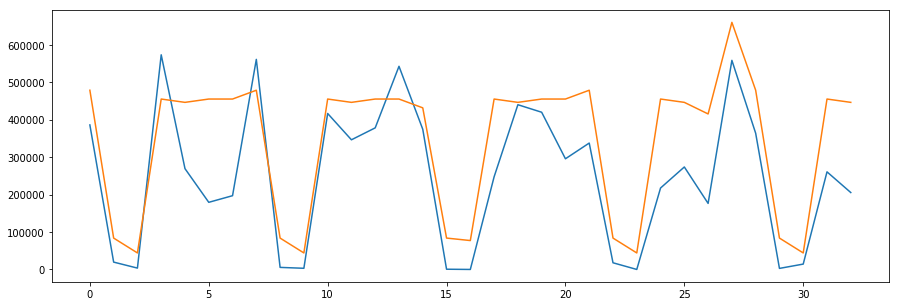

In [137]:
plt.figure(figsize=[15,5])
train[train.ATM_ID==guinea_ID].CLIENT_OUT.tail(33).reset_index(drop=True).plot()
tt.CLIENT_OUT.reset_index(drop=True).plot()
plt.show()

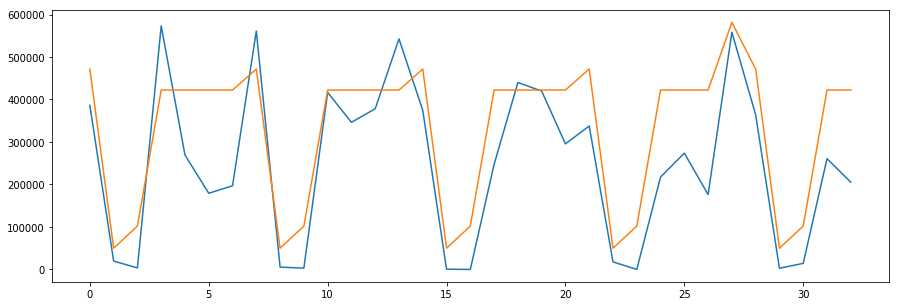

In [122]:
plt.figure(figsize=[15,5])
train[train.ATM_ID==guinea_ID].CLIENT_OUT.tail(33).reset_index(drop=True).plot()
subm.CLIENT_OUT.reset_index(drop=True).plot()
plt.show()

/home/pavel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


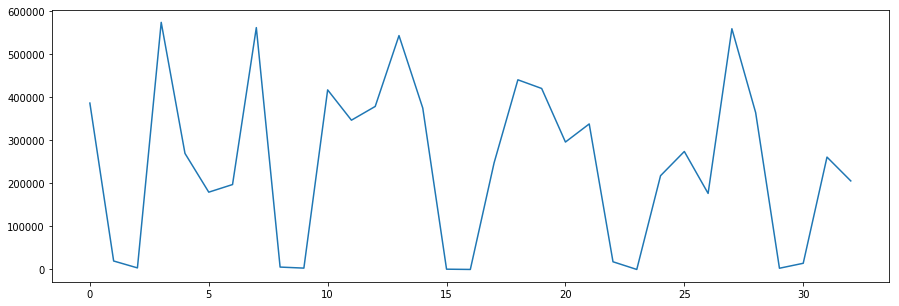

In [104]:
plt.figure(figsize=[15,5])
sample[train.ATM_ID==ho_IDs[16]].CLIENT_OUT.tail(33).reset_index(drop=True).plot()
plt.show()

In [108]:
ho_IDs[16]

376

In [106]:
print(sample[train.ATM_ID==ho_IDs[16]].tail(33))

             DATE  ATM_ID  CLIENT_OUT  DOW  DIM  DIP
260543 2017-07-14     376      386000    4   14   70
260544 2017-07-15     376       19600    5   15   71
260545 2017-07-16     376        3600    6   16   72
260546 2017-07-17     376      573300    0   17   73
260547 2017-07-18     376      269200    1   18   74
260548 2017-07-19     376      179300    2   19   75
260549 2017-07-20     376      197000    3   20   76
260550 2017-07-21     376      561100    4   21   77
260551 2017-07-22     376        5500    5   22   78
260552 2017-07-23     376        3100    6   23   79
260553 2017-07-24     376      416600    0   24   80
260554 2017-07-25     376      346300    1   25   81
260555 2017-07-26     376      378200    2   26   82
260556 2017-07-27     376      542600    3   27   83
260557 2017-07-28     376      374400    4   28   84
260558 2017-07-29     376         600    5   29   85
260559 2017-07-30     376           0    6   30   86
260560 2017-07-31     376      247400    0   3

/home/pavel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [468]:
PARAM_DAYS = 35
train_set = example.tail(PARAM_DAYS)
train_set['DIP'] = pd.Series(np.arange(PARAM_DAYS))

/home/pavel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [373]:
generated_ = sample.tail(28).groupby('DOW').CLIENT_OUT.agg(lambda x:mode(x)[0])[[2,3,4,5,6,0,1]]
generated = pd.concat((generated_, generated_, generated_, generated_, generated_[:5]))

In [374]:
generated_[[2,3,4,5,6,0,1]]

DOW
2    21800
3    39400
4    47900
5        0
6        0
0        0
1    30100
Name: CLIENT_OUT, dtype: int64

In [183]:
scorer(ho_test_set, submit)

0.942522053504588

In [219]:
import pandas as pd

train = pd.read_csv('train.csv.zip', parse_dates=['DATE'])
# The dates to predict
pred_dates  = ['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31',
               '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-16',
               '2017-09-17']

train['DOW'] = train.DATE.dt.dayofweek

def generate_month(series):
    generated_ = series.tail(28).groupby('DOW').CLIENT_OUT.mean()[[2,3,4,5,6,0,1]]
    generated = pd.concat((generated_, generated_, generated_, generated_, generated_[:5]))
#     return generated
    return pd.DataFrame({'DATE': pred_dates, 'CLIENT_OUT': generated})

gb = train.groupby('ATM_ID').apply(generate_month)

submit = gb.reset_index().drop('DOW', axis=1)

In [82]:
submit.to_csv('submission.csv', index=False)

In [222]:
submit[submit.ATM_ID==93].tail(33)

,ATM_ID,CLIENT_OUT,DATE
2607,93,28650,2017-08-16
2608,93,28250,2017-08-17
2609,93,10950,2017-08-18
2610,93,0,2017-08-19
2611,93,0,2017-08-20
2612,93,16325,2017-08-21
2613,93,37875,2017-08-22
2614,93,28650,2017-08-23
2615,93,28250,2017-08-24
2616,93,10950,2017-08-25


In [94]:
scorer(train, train)

0.0

In [66]:
pd.DataFrame({'DATE': pred_dates, 'CLIENT_OUT': generated})

,CLIENT_OUT,DATE
DOW,,
0,500325,2017-08-16
1,463250,2017-08-17
2,508600,2017-08-18
3,470550,2017-08-19
4,625675,2017-08-20
5,251700,2017-08-21
6,147500,2017-08-22
0,500325,2017-08-23
1,463250,2017-08-24


In [458]:
ho_IDs[23]

208

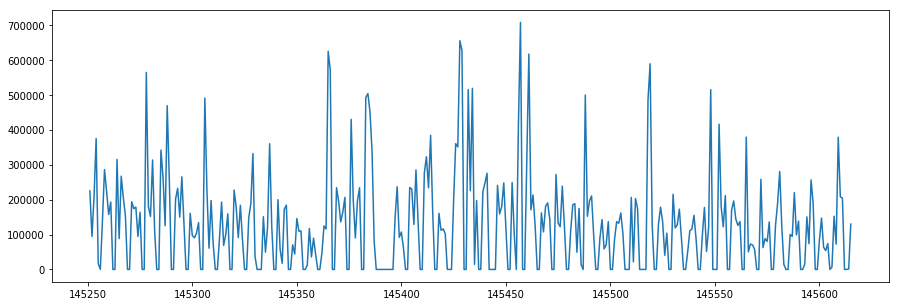

In [457]:
plt.figure(figsize=[15,5])
sample[sample.ATM_ID==ho_IDs[23]].CLIENT_OUT.tail(365).plot()
plt.show()

In [26]:
sample = s_train.tail(28).copy()

In [27]:
sample['DOW'] = sample.DATE.dt.dayofweek

In [29]:
gb = sample.groupby('DOW')

In [38]:
generated_ = gb.CLIENT_OUT.mean()

In [46]:
generated = pd.concat((generated_, generated_, generated_, generated_, generated_[:5]))

In [55]:
generated_

DOW
0    500325
1    463250
2    508600
3    470550
4    625675
5    251700
6    147500
Name: CLIENT_OUT, dtype: int64

In [14]:
sample.groupby("DATE")